<b><center>MACHINE LEARNING CIA PART B ACTIVITY
</center></b>

GROUP NO : 03

03 AKSHAY URMUDE 

23 SHRADDHA JAPE

33 HARSHADA KULKARNI

43 YASH MUSMADE

53 ROHIT SALVE

63 VAIBHAV VETAL

73 BHARAT MORE


<b>PROBLEM STATEMENT:</b> <b>Housing Prices Prediction Project</b>

Project idea-The dataset has house prices of the Boston residual areas. The expense of the house varies according to various factors like crime rate, number of rooms, ete. It is a good ML project for beginners to predict prices on the basis of new data.


<center><b>HYPERPARAMETER TUNING</b></center>

Hyperparameter tuning is a critical aspect of optimizing machine learning models. In essence, it 
involves adjusting the configuration settings of a learning algorithm before the training process to 
enhance the model's performance. These settings, known as hyperparameters, control the behavior 
and complexity of the model and are not learned from the data itself.The process typically begins by 
selecting relevant hyperparameters based on the specific algorithm being used. Then, a search space 
is defined, specifying the range of values or options for each hyperparameter. Various optimization 
techniques can be employed to explore this space effectively, such as grid search, random search, 
Bayesian optimization, or evolutionary algorithms.
During the exploration phase, the performance of each hyperparameter configuration is evaluated 
using a chosen metric, which could be accuracy, precision, recall, or another suitable measure 
depending on the nature of the problem. Cross-validation is often employed to obtain robust estimates 
of model performance across different subsets of the data.Once the optimal hyperparameters are 
identified through this iterative process, the model is trained using the entire dataset with these 
settings. Finally, the model's performance is validated on a separate test dataset to assess its 
generalization ability.Hyperparameter tuning can significantly impact the model's effectiveness, 
leading to improved predictions and better overall performance on real-world tasks. However, it can 
also be computationally expensive, particularly for complex models and large datasets, due to the need 
for multiple training iterations with different hyperparameter configurations.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\HP\AppData\Local\Temp\ipykernel_3560\1787856364.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
Boston = pd.read_csv("BostonHousing.csv")

In [4]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
Boston.shape

(506, 14)

In [7]:
Boston["chas"] = Boston["chas"].astype('category')

In [8]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     506 non-null    float64 
 1   zn       506 non-null    float64 
 2   indus    506 non-null    float64 
 3   chas     506 non-null    category
 4   nox      506 non-null    float64 
 5   rm       501 non-null    float64 
 6   age      506 non-null    float64 
 7   dis      506 non-null    float64 
 8   rad      506 non-null    int64   
 9   tax      506 non-null    int64   
 10  ptratio  506 non-null    float64 
 11  b        506 non-null    float64 
 12  lstat    506 non-null    float64 
 13  medv     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


In [9]:
def iqr_func(data):
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    return iqr

In [10]:
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    for i in data :
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)    
    return outlier

In [11]:
column_names = list(Boston.columns)
Boston_out   = pd.DataFrame()
for name in column_names:
    Boston_out[name] = outlier_func(Boston[name])  

In [10]:
Boston_out.drop('chas', inplace=True, axis=1)

In [11]:
Boston_colsum = Boston_out.sum()
Boston_colsum

crim       66
zn         68
indus       0
nox         0
rm          0
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64

In [12]:
Boston_out.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
Boston_rowsum = Boston_out.sum(axis = 1)
Boston_rowsum 

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64

In [14]:
list(Boston_rowsum[Boston_rowsum  == 4].index)

[]

In [15]:
n_otlier_feature = 3
for j in range(len(Boston)):
    if Boston_rowsum[j] >= n_otlier_feature:
        Boston = Boston.drop(j)

In [16]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     502 non-null    float64 
 1   zn       502 non-null    float64 
 2   indus    502 non-null    float64 
 3   chas     502 non-null    category
 4   nox      502 non-null    float64 
 5   rm       497 non-null    float64 
 6   age      502 non-null    float64 
 7   dis      502 non-null    float64 
 8   rad      502 non-null    int64   
 9   tax      502 non-null    int64   
 10  ptratio  502 non-null    float64 
 11  b        502 non-null    float64 
 12  lstat    502 non-null    float64 
 13  medv     502 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 55.5 KB


In [17]:
Boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [18]:
mms = MinMaxScaler() 

In [21]:
print(mms)

MinMaxScaler()


In [19]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     502 non-null    float64 
 1   zn       502 non-null    float64 
 2   indus    502 non-null    float64 
 3   chas     502 non-null    category
 4   nox      502 non-null    float64 
 5   rm       497 non-null    float64 
 6   age      502 non-null    float64 
 7   dis      502 non-null    float64 
 8   rad      502 non-null    int64   
 9   tax      502 non-null    int64   
 10  ptratio  502 non-null    float64 
 11  b        502 non-null    float64 
 12  lstat    502 non-null    float64 
 13  medv     502 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 55.5 KB


In [20]:
Boston_scaling = mms.fit_transform(Boston.loc[:, Boston.columns != "chas"]) 

In [21]:
Boston_scaling = pd.DataFrame(Boston_scaling)

In [22]:
Boston_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       503 non-null    float64
 1   1       503 non-null    float64
 2   2       503 non-null    float64
 3   3       503 non-null    float64
 4   4       498 non-null    float64
 5   5       503 non-null    float64
 6   6       503 non-null    float64
 7   7       503 non-null    float64
 8   8       503 non-null    float64
 9   9       503 non-null    float64
 10  10      503 non-null    float64
 11  11      503 non-null    float64
 12  12      503 non-null    float64
dtypes: float64(13)
memory usage: 51.2 KB


In [23]:
Boston_scaling.columns = ['crim', 'zn','indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
                           'ptratio','black','lstat', 'medv']

In [24]:
Boston_scaling.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000


In [27]:
corrMatrix = Boston_scaling.corr()
print (corrMatrix)

             crim        zn     indus       nox        rm       age       dis  \
crim     1.000000 -0.198712  0.403546  0.417992 -0.193318  0.347296 -0.375742   
zn      -0.198712  1.000000 -0.532893 -0.516020  0.309920 -0.568788  0.663965   
indus    0.403546 -0.532893  1.000000  0.762738 -0.389228  0.642752 -0.706241   
nox      0.417992 -0.516020  0.762738  1.000000 -0.298312  0.730965 -0.768531   
rm      -0.193318  0.309920 -0.389228 -0.298312  1.000000 -0.232224  0.195433   
age      0.347296 -0.568788  0.642752  0.730965 -0.232224  1.000000 -0.746439   
dis     -0.375742  0.663965 -0.706241 -0.768531  0.195433 -0.746439  1.000000   
rad      0.622486 -0.309895  0.591762  0.608506 -0.196984  0.451425 -0.490140   
tax      0.579493 -0.312522  0.718725  0.665785 -0.281823  0.502562 -0.530561   
ptratio  0.286131 -0.390367  0.380269  0.184981 -0.353928  0.258092 -0.228765   
black   -0.357729  0.171710 -0.349578 -0.373797  0.097650 -0.263860  0.281875   
lstat    0.429638 -0.416678 

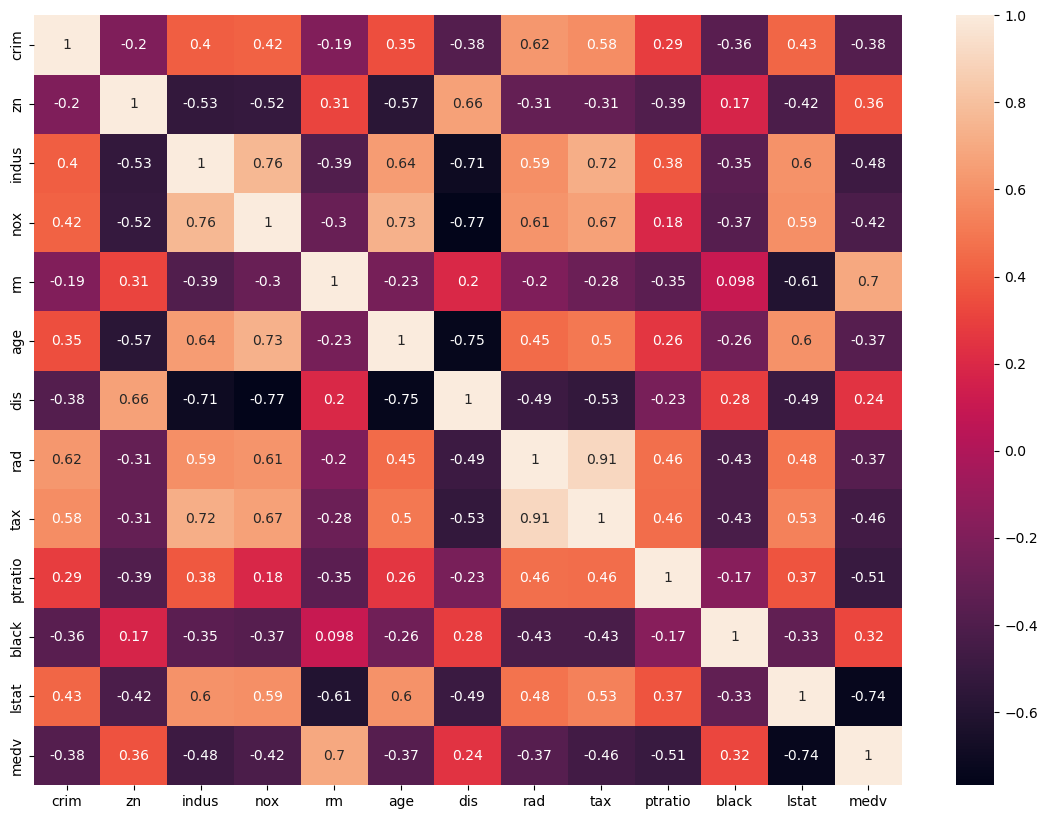

In [28]:
fig = plt.figure(figsize =(14, 10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
Data_step2 = Boston_scaling.loc[:, ["medv", "lstat"]]

In [30]:
data_train, data_test = train_test_split(Data_step2, test_size=0.20, random_state = 42)

In [31]:
model = LinearRegression()
x_train = np.array(data_train["lstat"]).reshape((-1, 1))
y_train = np.array(data_train["medv"])
model.fit(x_train,y_train)

LinearRegression()

In [32]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.544839819662919


In [33]:
print(f"intercept: {model.intercept_}")

intercept: 0.6262300082651284


In [34]:
print(f"slope: {model.coef_}")

slope: [-0.78684433]


In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(x_train)) #mean_squared_error(Y_true,Y_pred)

0.019471516848270587

In [36]:
x_test = np.array(data_test["lstat"]).reshape((-1, 1))
y_test = np.array(data_test["medv"])
mean_squared_error(y_test, model.predict(x_test)) #mean_squared_error(Y_true,Y_pred)

0.015893998385939374

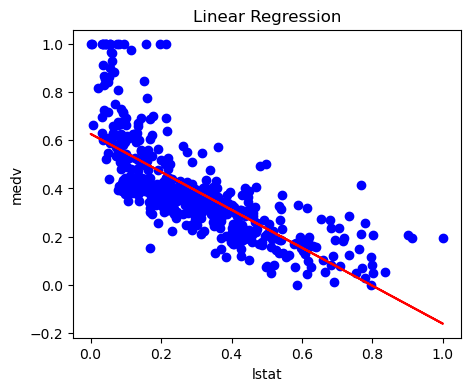

In [37]:
plt.figure(figsize=(5, 4))
plt.scatter(Boston_scaling["lstat"], Boston_scaling["medv"], color = 'blue')  
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
new_data = pd.DataFrame([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90]],
                        columns=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'])
rf_model = RandomForestRegressor(random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END ma

In [59]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
